# Exploratory Data Analysis for the south African Data

We load the necessary packages

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We fist load the data from the University of Cape Town

In [3]:
df = pd.read_csv(r"..\Data\SAdata\2013_A.csv")
df1 = pd.read_csv(r"..\Data\SAdata\2012_A.csv")


Lets get a sight of the data 

In [9]:
df2 = pd.read_csv(r"..\Data\SAdata\2014_A.csv")


In [10]:
df2.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid
0,GNKT29,12029084,2014-10-01 00:00:00,0.0,1.0
1,GNKT29,12029084,2014-10-01 01:00:00,0.0,1.0
2,GNKT29,12029084,2014-10-01 02:00:00,0.0,1.0
3,GNKT29,12029088,2014-10-01 00:00:00,0.0,1.0
4,GNKT29,12029088,2014-10-01 01:00:00,0.0,1.0


In [40]:
df1.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid
0,BTW001,12005762,2012-10-01 00:00:00,1.200000,1.0
1,BTW001,12005762,2012-10-01 01:00:00,1.300000,1.0
2,BTW001,12005762,2012-10-01 02:00:00,1.216667,1.0
3,BTW001,12005762,2012-10-01 03:00:00,1.233333,1.0
4,BTW001,12005762,2012-10-01 04:00:00,1.316667,1.0


There is two IDs, we need to find out which one refers to households. To do so, we will look at the number of data points per ID. There are 8760 hours in a year, we need to look for lengths around this value

In [50]:
#Lengths of Recorder ID groups
groups = df.groupby("RecorderID")['Unitsread'].apply(lambda x: len(x))
groups = groups.sort_values(ascending = False)
print(groups.head())

#Lengths of Profile ID groups
groups1 = df.groupby("ProfileID")['Unitsread'].apply(lambda x: len(x))
groups1 = groups1.sort_values(ascending = False)
print(groups1.head())
len(groups1)

RecorderID
HKY024    26856
HKY023    26856
HKY022    26856
HKY021    26856
HKY025    26856
Name: Unitsread, dtype: int64
ProfileID
12020638    8757
12020790    8757
12020621    8757
12020616    8757
12020612    8757
Name: Unitsread, dtype: int64


1782

In [45]:
print(groups1)

ProfileID
12019715    1464
12020794    1464
12020668    1464
12020616    1464
12020621    1464
12020625    1464
12020629    1464
12020634    1464
12020638    1464
12020642    1464
12020647    1464
12020651    1464
12020655    1464
12020660    1464
12020664    1464
12020673    1464
12020608    1464
12020677    1464
12020681    1464
12020686    1464
12020690    1464
12020694    1464
12020699    1464
12020703    1464
12020707    1464
12020725    1464
12020729    1464
12020733    1464
12020738    1464
12020612    1464
            ... 
12021188    1392
12021184    1392
12021180    1392
12022272    1314
12022276    1314
12022280    1314
12020348    1308
12020356    1308
12020352    1308
12022571    1251
12022579    1251
12022575    1251
12022796    1235
12022800    1235
12022792    1235
12022202    1218
12022198    1218
12022194    1218
12009085    1057
12009081    1057
12009077    1057
12009064     935
12009072     935
12009068     935
12023008     924
12023004     924
12023000     924
1202

We can see that the right ID is the profile ID. There is however not exactly 8760 values, lets plot the number of values for each ID to get more insight

765


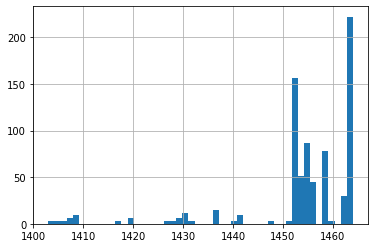

In [49]:
groups1 = groups1[groups1<2000]
groups1 = groups1[groups1 > 1400]

print(len(groups1))

groups1.hist(bins = 50)




There is a lot of IDs with very few values, we should filter them to keep only IDs with enough values

In [52]:
groups1 = groups1[groups1>8700]


print(len(groups1))

df1= df1[df1["ProfileID"].isin(groups1.index)]

525


When now need to see if the Ids kept have real value or not. To do so, we will sum the reading for each ID and check if some are equal to 0

In [34]:
grp = df1.groupby("ProfileID")['Unitsread'].sum()

len(grp[grp == 0])

92

There is a lot of IDs equal to 0, we will filter them out

In [35]:
grp = grp[grp>1]

print(len(grp))

df= df[df["ProfileID"].isin(grp.index)]

387


Most of the IDs are still not full for a whole year, there is some timestamps missing. We should identify these timestamp, include nans there and add these to the main dataset. Afterwards, we will have a full dataset, with 8760 entries per remaining Ids


In [9]:
year = pd.date_range("01/01/2013 00:00", "31/12/2013 23:00", freq="1h")

d = [None]*415
add = [None]*415
ids = list(grp.index)
for i in range(len(d)):
    d[i] = df[df["ProfileID"] == ids[i]]
    r = d[i]["Datefield"]
    years = [x.strftime("%Y-%m-%d %H:%M:%S") for x in year]
    main_list = np.setdiff1d(list(years),list(r))
    
    add[i] = pd.DataFrame({"RecorderID": "BTW001", "ProfileID":ids[i], "Datefield": main_list,"Unitsread": np.nan, "Valid": 1})
    
    #d[i] = d[i].append(add[i])
    
    #d[i] = d[i].sort_values(['ProfileID', 'Datefield'])
    
    #d[i] = d[i].reset_index(drop = True)
    
    df = df.append(add[i])
    
df = df.sort_values(['ProfileID', 'Datefield'])

df = df.reset_index(drop = True)



We now have to handle the nans in the dataset


In [12]:
df.to_csv(r"..\Data\SAdata\SA_revised.csv")